In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
x = pd.DataFrame(data.data,columns = data.feature_names)

In [9]:
y = pd.Series(data.target)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42,stratify=y)

In [14]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
model = LogisticRegression(random_state=42,solver='liblinear')
model.fit(x_train_scaled,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [18]:
y_pred = model.predict(x_test_scaled)

In [19]:
y_pred_proba = model.predict_proba(x_test_scaled)[:,1]

In [20]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[41,  1],
       [ 1, 71]], dtype=int64)

In [21]:
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred_proba)

In [22]:
print(f"\nPrecision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")


Precision: 0.9861111111111112
Recall: 0.9861111111111112
F1-Score: 0.9861111111111112
ROC-AUC Score: 0.9957010582010581


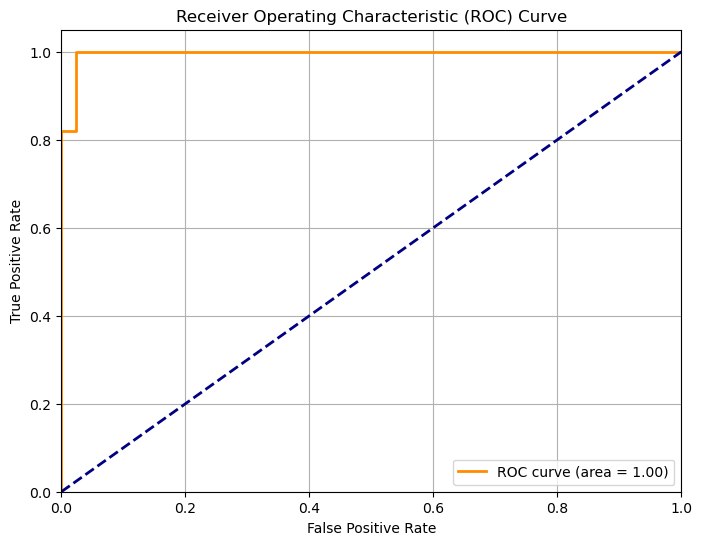

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The sigmoid (or logistic) function maps any real-valued number into a value between 0 and 1. In logistic regression, it transforms the linear output into a probability, which can then be thresholded to make a binary classification decision